# Detector Portátil de Emoções

## Caracterização do problema

Vimos uma necessidade de sistemas longos e de processamento demorado para classificar e reconhecer emoções em imagens.
<br>Queríamos nos propôr a criar um sistema totalmente embarcado, que classificasse as imagens on-the-fly, e pudesse dar o resultado de uma maneira divertida.

## Objetivos do projeto

Nosso objetivo era desenvolver um detector portátil em tempo real de emoções com feedback visual, reduzindo as possíveis emoções para as seis do modelo de Paul Ekman - o "Big Six", e exibindo um emoticon correspondente.
<br>Usando um treinamento de modelo de reconhecimento com SVM Linear, criamos a base em um computador de alta performance, e portamos essa base já treinada para um Raspberry Pi, que possui poder o suficiente para classificar as imagens sem auxílio de dispositivos externos.
<br>Embarcando todo esse sistema em uma carapaça divertida, criamos a oportunidade de prover ao usuário um sistema que esconde seus _internals_ e realiza o processo numa interação simples.
 
## Abordagem / Metodologia adotada

Para o desenvolvimento deste trabalho foram utilizados:
* Raspberry Pi 3;
* Câmera dedicada do Raspberry Pi;
* Tela ‘hat’ Raspberry;
* Bibliotecas  para Python: OpenCV e Dlib.
<br>Para a modelagem das emoções, adotamos o "Big Six" de Paul Ekman.
<br>Para a técnica de treinamento da nossa base, usamos uma base de faces de Cohn-Kanade, treinamos um modelo de acordo com o tutorial aprendido na atividade 5 do T3.
<br><sub>Disponível neste [link](http://www.paulvangent.com/2016/08/05/emotion-recognition-using-facial-landmarks/).</sub>


## Possíveis problemas enfrentados / Possíveis mudanças de trajetória

No início da concepção do projeto, vimos rapidamente que teríamos que reduzir o escopo do projeto para conseguirmos construir de fato o protótipo.
<br>A idéia inicial seria um "robô", um sistema, que reconhecesse todas as faces de um determinado local, reconhecesse cada uma delas, e encontrasse uma emoção específica, ou encontrasse alguém que mostrasse o maior índice de determinada emoção.
<br>Mudamos a trajetória do projeto, voltando o foco para a classificação de emoções em imagens, adicionando a captura _on-the-fly_, e a redução das emoções a emoticons, tentando exemplificar a emoção do usuário.

Quanto a problemas, antes de decidirmos treinar o modelo em um computador de alta performance e passar a base já treinada, tivemos dificuldades com o Raspberry Pi.
<br>Ao portar o sistema, tivemos problemas para ter compatibilidade das duas plataformas, pois cada pacote e biblioteca precisam ser construídos individualmente, e alguns destes têm versões levemente diferentes para um computador e para o Raspberry Pi, o que leva a pequenas incompatibilidades que impossibilitam a compilação do programa.

## Resultados

Obtivemos resultados positivos com o sistema como um todo, conseguindo desenvolver uma plataforma portátil e operacional que entregasse de forma adequada os resultados esperados e com tempo de operação relativamente rápido. <br>Observou-se ainda que o classificador de emoções tem precisão limitada decorrente da base de treinamento reduzida que foi utilizada, mas ainda assim os resultados foram percebidos como positivos, para um protótipo.
<br>Além disso, com a abordagem de treinar o modelo desenvolvido em outro computador foi possível treinar modelos mais complexos e portá-los para plataformas embarcadas, permitindo essa mobilidade com sistemas de reconhecimento e contornando o problema de baixo processamento que o sistema utilizado apresentava anteriormente.

## Discussão dos resultados

O classificador gerado é bastante impreciso, fator que pode ser contornado ao utilizar uma outra base de treinamento com muito mais dados, o que melhoraria consideravelmente o resultado final. Além disso, é possível utilizar outras abordagens no desenvolvimento do sistema, como as Redes Neurais Convolucionais, que poderiam melhorar ainda mais a precisão dos classificadores.
<br>Ao final, concluímos que o projeto atende adequadamente o objetivo inicial de construir um protótipo, com a classificação de faces interativas operando em um sistema embarcado portátil e com uma precisão relativamente boa.


## Conclusões / Lições Aprendidas

O projeto apresentado é generalista e permite que haja um intercâmbio para diversas áreas do conhecimento dependendo do objetivo almejado. Uma das principais aplicações seriam as tecnologias assistivas, porém há uma grande abertura para uso educacional e até mesmo comercial, como em brinquedos interativos.
<br>Quanto aos sistema utilizado, percebemos que sistemas embarcados requerem um nível de atenção muito maior do que trabalhar com computadores comuns, pois o tipo de arquitetura e as características computacionais interferem de forma significativa no desenvolvimento do projeto.
<br>Além disso, por ser um sistema de baixo processamento, fez-se necessário o treinamento em outra máquina e então a transferência da base treinada para o Raspberry, e essa transferência nem sempre é tão simples, demandando um trabalho de ajustes para que o funcionamento seja plenamente preservado.


## Trabalhos Futuros

Uma futura versão do protótipo poderia ser muito mais robusta, com uma câmera melhor - uma câmera com resolução maior e um sensor melhor, não sendo a câmera própria do Raspberry Pi.
<br>Para melhorar a precisão do nosso classificador, podemos analisar se nosso sistema é capaz de encontrar uma face na imagem. Essa função pode ser útil para pedir que o usuário tire uma nova foto caso uma face não seja encontrada.
<br>A princípio, atualmente, o sistema tenta classificar a imagem mesmo não encontrando uma face, tentando usar a base treinada para encontrar alguma emoção.

<br>Com as melhorias mencionadas acima, é possível a criação de um protótipo dramaticamente melhorado.

## Código Utilizado

In [ ]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')


def crop_faces(img_path):
    # convert BGR image to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))
    facenum = 0
    # get bounding box for each detected face
    face_path = []
    for (x,y,w,h) in faces:
        # add bounding box to color image
        print x,y,w,h
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        gray = img[y:y+h, x:x+w] #Cut the frame to size

        try:
            out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
            #out_path = img_path + "{0}.jpg".format(facenum)
            out_path = "cut.jpg"
            cv2.imwrite( out_path , cv2.resize(gray, (350, 350))) #Write image
            facenum+=1
            face_path.append("cut.jpg".format(facenum))
            return "cut.jpg"
        except:
            print ("Exception raised")
            return img_path #If error, pass file
#test it
crop_faces("test_images/test_mult_faces.jpg")

Outra opção pra detectar faces seria recortar desse jeito, faz sentido

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt                        
%matplotlib inline 

faceDet = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt_tree.xml")
def detect_faces(img_path):
    frame = cv2.imread(img_path) #Open image

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
    plt.imshow(gray)

    #Detect face using 4 different classifiers
    face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
    face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
    face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
    face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

    #Go over detected faces, stop at first detected face, return empty if no face.
    if len(face) == 1:
        facefeatures = face
    elif len(face_two) == 1:
        facefeatures = face_two
    elif len(face_three) == 1:
        facefeatures = face_three
    elif len(face_four) == 1:
        facefeatures = face_four
    else:
        facefeatures = ""
        print("oops, not found")
    print("facef{0}".format(facefeatures))
    facenum = 0
    #Cut and save face
    for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
        print "face found in file: {0}".format(len(facefeatures))
        gray = gray[y:y+h, x:x+w] #Cut the frame to size
        
        #try:
        out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
        cv2.imwrite("cut{0}.jpg".format(facenum) , out) #Write image
         #print("ok")
        facenum+=1
        #except:
         #   print("error") #If error, pass file
        
detect_faces("test_images/test_mult_faces.jpg")

### Carregando o Modelo

In [ ]:
#inits
from IPython.display import Image, display
from time import sleep
from sklearn.externals import joblib
import cv2
import dlib
import glob
import numpy as np
import math
import random
clf = joblib.load('trained_classifier_L.pkl') 
detector = dlib.get_frontal_face_detector()

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Or set this to whatever you named the downloaded file

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
items = glob.glob("test_images\\*")
emotions = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"] #Emotion list



In [ ]:
def get_landmarks(image):
    data = {}
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]

        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))

        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1: 
        data['landmarks_vestorised'] = "error"
    return data
def classify_image(item):
    data = {}
    pred = []
    image = cv2.imread(item) #open image
    #image = cv2.resize(image, (350,350))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
    clahe_image = clahe.apply(gray)
    data = get_landmarks(clahe_image)
    if data['landmarks_vectorised'] == "error":
        result = emotions[random.randint(0, len(emotions))]
        print ("ERROR, PORRA")
    else:
        l = Image(data['landmarks_vectorised']) 
        display(l)
        pred.append(data['landmarks_vectorised'])
        
    x = Image(filename=item) 
    display(x)
    result = clf.predict_proba(np.array(pred)) 
    print("Raw results: {0} \n Detected emotion:{1}".format(result, emotions[np.argmax(result)]))
    sleep(2)

In [ ]:
items = glob.glob("test_images\\*")
for item in items:
    classify_image(item)

<br>Com os testes da base de treinamento, obtivemos precisão média aproximada de 75%.
<br>Como tínhamos bases treinadas já salvas, escolhemos a de melhor precisão média e aplicamos neste sistema. Transferimos a base para o Raspberry Pi, e instalamos e compilamos todas as bibliotecas necessárias.

In [ ]:
#https://codeplasma.com/2012/12/03/getting-webcam-images-with-python-and-opencv-2-for-real-this-time/
import cv2
def get_image():
 # read is the easiest way to get a full image out of a VideoCapture object.
    retval, im = camera.read()
    return im
# Camera 0 is the integrated web cam on my netbook
camera_port = 0
camera = cv2.VideoCapture(camera_port)
# Take the actual image we want to keep
camera_capture = get_image()
file = "test_image.png"
# A nice feature of the imwrite method is that it will automatically choose the
# correct format based on the file extension you provide. Convenient!
cv2.imwrite(file, camera_capture)
 
# You'll want to release the camera, otherwise you won't be able to create a new
# capture object until your script exits
del(camera)

cropped = crop_faces(file)
print cropped
classify_image(cropped)
#del(camera)
#detect_faces(file)



### Configurações do Sistema Embarcado

Nesse projeto, utilizamos o sistema operacional Raspbian mais recente, o Stretch(https://www.raspberrypi.org/downloads/). Para que o sistema comece a funcionar, basta gravar o arquivo ".iso", disponível no link acima, em um cartão de memória SD com no mínimo 8GB e energizar a placa. 
Já para configurar a raspberry para nosso projeto, o processo é um pouco mais longo:

1. Utilizamos o driver disponível em https://www.waveshare.com/wiki/3.5inch_RPi_LCD_(A) . Após a instralação do mesmo, é necessário calibrar o sensor de toque, utilizando o comando xinput-calibrator;
2. Instalamos a câmera seguindo o tutorial  https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python/ . Felizmente, como a câmera utilizada é compatível com a original da raspberry, a instalação é simplificada, sendo baseada unicamente em uma configuração;
3. Instalar OpenCV: Seguimos o tutorial disponível em: https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python/ Vale ressaltar que como o processador da Raspberry é plataforma ARM, é necessário compilar a biblioteca OpenCV (tempo mínimo de 4 horas), já que as versões já compiladas disponíveis em gerenciadores de pacote como Anaconda não são compatíveis. Um ponto chave descrito no tutorial é aumentar a memória de swap para que a compilação tenha sucesso sem exceder o limite de memória RAM disponível;
4. Instalar a biblioteca DLIB: para esse processo, é necessário não só aumentar a memória de swap para 1024MB como também desabilitar a tela de Desktop do sistema e reduzir a quantidade de memória dedicada ao módulo de vídeo (de 128 MB para 16 MB). Para a instalação, seguimos o tutorial https://www.pyimagesearch.com/2017/05/01/install-dlib-raspberry-pi/;


### Testes do Sistema Embarcado
Para garantir que o sistema funcionaria como um todo, isolamos os módulos embarcados e realizamos um teste para cada módulo


#### Teste da Câmera
Para testar a câmera, utilizamos o código disponível no tutorial https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python/ como base para acessar, configurar e obter uma imagem inicial. 
O processo utiliza a biblioteca picamera para a interface com a câmera e a OpenCV para a aquisição e exibição da mesma, o que é conveniente tendo em mente que utilizamos a mesma biblioteca para nosso classificador. 
O código considerado foi:

In [ ]:
#extracted from https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python

# import the necessary packages
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
 
# initialize the camera and grab a reference to the raw camera capture
camera = PiCamera()
rawCapture = PiRGBArray(camera)
 
# allow the camera to warmup
time.sleep(0.1)
 
# grab an image from the camera
camera.capture(rawCapture, format="bgr")
image = rawCapture.array
 
# display the image on screen and wait for a keypress
cv2.imshow("Image", image)
cv2.waitKey(0)


#### Teste do botão
Para testarmos a construção que fizemos com o botão, utilizamos a biblioteca nativa das GPIOs da raspberry com o pino usado, que foi o 21.

In [ ]:
import RPi.GPIO as GPIO
import time

GPIO.setmode(GPIO.BCM)
GPIO.setup(21, GPIO.IN, pull_up_down=GPIO.PUD_UP)

while True:
    input_state = GPIO.input(21)
    
    if input_state != True:
        print('Button Pressed')
        time.sleep(0.2)

### Código Final ( Raspberry)
Para o código final, juntamos todos os módulos descritos anteriormente em um único script. Para otimizar o funcionamento, as funções mais lentas são executadas apenas na inicialização do programa.

Seu funcionamento consiste em:
    1. Carregar bibliotecas utilizadas;
    2. Carregar modelo pré-treinado utilizando uma representação serializada do modelo já treinado, arquivo pickle;
    3. Carregar sistemas reconhecedores de landmarks;
    4. Definir funções de reconhecimento de emoções;
    5. Loop de leitura do status do botão e execução do módulo de salvar imagem, do reconhecedor e do exibidor de resultado;
    6. Callback para limpar as telas quando um botão for pressionado, com o intuito de fazer com que o programa possa analisar várias imagens em seguida.

In [ ]:
#WARNING: this code contains pieces of other codes used as reference, preciously cited

# import the necessary packages
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
from time import sleep
from sklearn.externals import joblib
import cv2
import dlib
import glob
import numpy as np
import math
import random
import cPickle
import pickle
import RPi.GPIO as GPIO
import time


with open('mypickle.pickle') as f:
    clf = pickle.load(f)

#load dlib landmark detectors
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Or set this to whatever you named the downloaded file
#load clahe filter 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')


emotions = ["anger", "contempt", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"] 


def get_landmarks(image):
    data = {}
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []

        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
            
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]

        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            dist = np.linalg.norm(coornp-meannp)
            landmarks_vectorised.append(dist)
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        data['landmarks_vectorised'] = landmarks_vectorised

    if len(detections) < 1: 
        data['landmarks_vestorised'] = "error"
    
    return data


def classify_image(item):
    data = {}
    pred = []
    image = cv2.imread(item) #open image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
    clahe_image = clahe.apply(gray)
    data = get_landmarks(clahe_image)
    try:
        if data['landmarks_vectorised'] == "error":
            result = emotions[random.randint(0, len(emotions))]
            print ("ERROR, PORRA")
        else:
            pred.append(data['landmarks_vectorised'])

        result = clf.predict_proba(np.array(pred)) 
        detect_emot = np.argmax(result)
        print("Raw results: {0} \n Detected emotion:{1}".format(result, emotions[detect_emot]))
    except:
        detect_emot = random.randint(0, len(emotions)-1)
        print("xxk Detected emotion:{0}".format(emotions[detect_emot]))
    return detect_emot

def crop_faces(img_path):
    # convert BGR image to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))
    facenum = 0

    # get bounding box for each detected face
    face_path = []
    if len(faces) == 0:
        return img_path

    for (x,y,w,h) in faces:
        # add bounding box to color image
        print x,y,w,h
        gray = img[y:y+h, x:x+w] #Cut the frame to size
        #search, cut and rescale to optimal size. If not found, return original
        try:
            out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
            out_path = "/home/pi/Desktop/final/cut.jpg"
            cv2.imwrite( out_path , cv2.resize(gray, (350, 350))) #Write image
            facenum+=1
            face_path.append("/home/pi/Desktop/final/cut.jpg".format(facenum))
            return "/home/pi/Desktop/final/cut.jpg"
        except:
            return img_path


#callback to close emoji window when button is pressed
def my_callback(channel):  
    cv2.destroyAllWindows()

#set button up on GPIO21
GPIO.setmode(GPIO.BCM)
GPIO.setup(21, GPIO.IN, pull_up_down=GPIO.PUD_UP)

#Start camera
camera = PiCamera()
GPIO.add_event_detect(21, GPIO.FALLING, callback=my_callback, bouncetime=300)

print('waiting, master')

while True:
    input_state = GPIO.input(21)
    if input_state == False:

        rawCapture = PiRGBArray(camera)
        #acquire and save image
        file = "/home/pi/Desktop/final/test_image.png"
        camera.capture(rawCapture, format="bgr")
        image = rawCapture.array
        cv2.imwrite(file, image)


        ##classify
        cropped = crop_faces(file)
        result = classify_image(cropped)
        #Looks awful but works
        if result == 0:
            cv2.imshow("anger",cv2.imread("/home/pi/Desktop/final/faces/anger.png")	)
            cv2.waitKey()
        if result == 1:
            cv2.imshow("contempt",cv2.imread("/home/pi/Desktop/final/faces/contempt.png")	)
            cv2.waitKey()

        if result == 2:
            cv2.imshow("disgust",cv2.imread("/home/pi/Desktop/final/faces/disgust.png")	)
            cv2.waitKey()

        if result == 3:
            cv2.imshow("fear",cv2.imread("/home/pi/Desktop/final/faces/fear.png")	)
            cv2.waitKey()

        if result == 4:
            cv2.imshow("happiness",cv2.imread("/home/pi/Desktop/final/faces/happiness.png")	)
            cv2.waitKey()

        if result == 5:
            cv2.imshow("neutral",cv2.imread("/home/pi/Desktop/final/faces/neutral.png")	)
            cv2.waitKey()

        if result == 6:
            cv2.imshow("sadness",cv2.imread("/home/pi/Desktop/final/faces/sadness.png")	)
            cv2.waitKey()

        if result == 7:
            cv2.imshow("surprise",cv2.imread("/home/pi/Desktop/final/faces/surprise.png")	)
            cv2.waitKey()

# Hardware Final

No fim do projeto, o nosso protótipo ficou como a seguir:

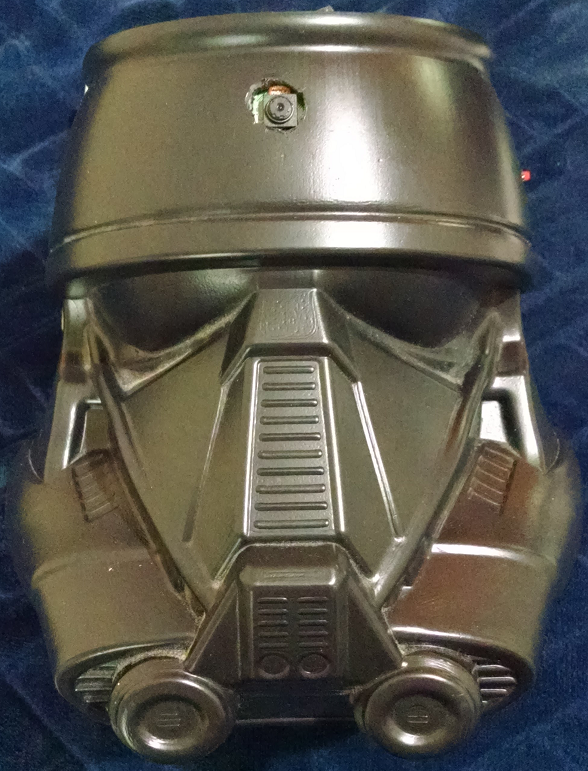

In [2]:
from IPython.display import Image
Image(filename=u'storm1.png')

Vista frontal do sistema completo, com a câmera em vista na parte superior.

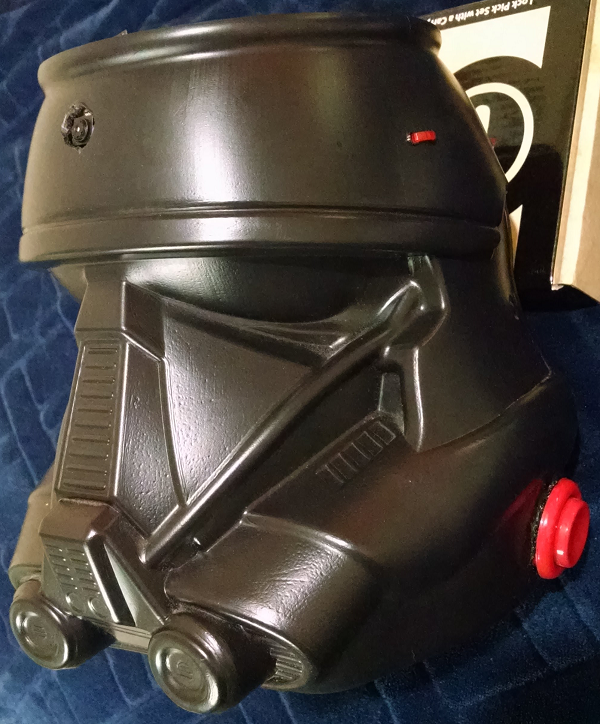

In [3]:
from IPython.display import Image
Image(filename=u'storm2.png')

Vista lateral, com detalhe para o botão vermelho, que inicia a operação de reconhecimento facial e de classificação de emoções, uma vez que o módulo de Python está carregado e rodando em nosso Raspberry Pi.

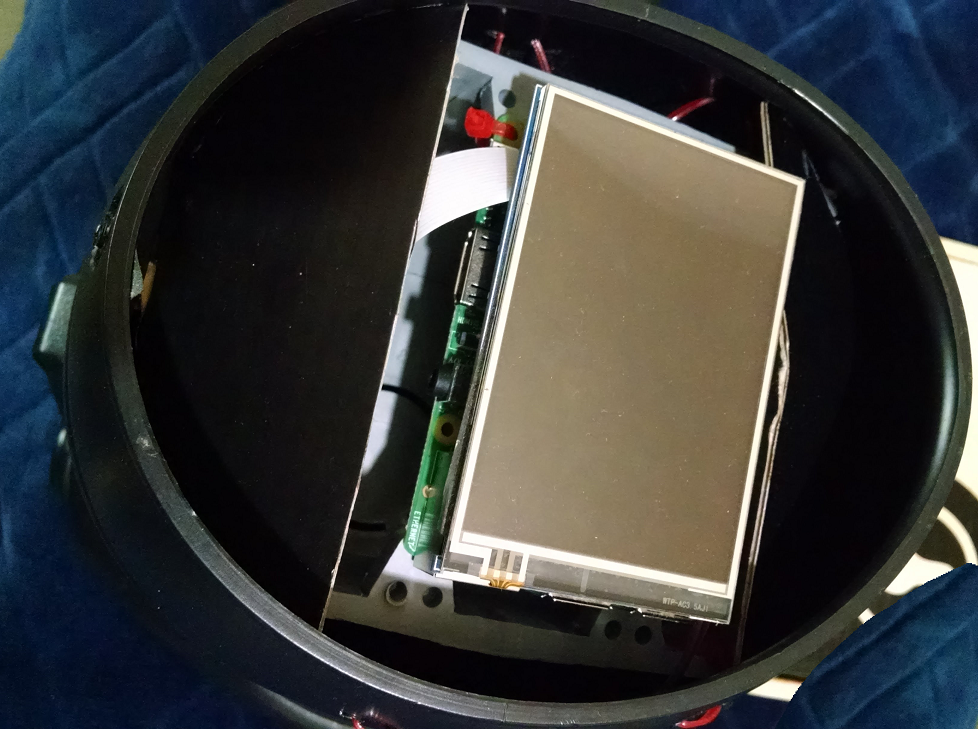

In [4]:
from IPython.display import Image
Image(filename=u'storm3.png')

Vista superior, com a tela de interface à mostra.
<br>A tela do Raspberry é o módulo que exibe o resultado da classificação de emoções, demonstrando um emoticon pré-determinado e representativo das seis emoções - mais a emoção "neutra", totalizando sete resultados possíveis - do modelo que escolhemos, o "Big Six" de Paul Ekman.